In [1]:
from streamer import NIStreamer
import numpy as np

In [2]:
ni_streamer = NIStreamer()

#### Add cards

In [3]:
fast_ao_card = ni_streamer.add_card(
    card_type='AO',
    max_name='PXI1Slot3',
    samp_rate=1e6,
    trig_mode='prim',
    trig_line='PXI_Trig0',
    ref_clk_mode='prim',
    ref_clk_line='PXI_Trig7',
    ref_clk_rate=10e6,
    nickname='fast_ao_card'
)

slow_ao_card = ni_streamer.add_card(
    card_type='AO',
    max_name='PXI1Slot4',
    samp_rate=250e3,
    trig_mode='sec',
    trig_line='PXI_Trig0',
    ref_clk_mode='sec',
    ref_clk_line='PXI_Trig7',
    ref_clk_rate=10e6
)

do_card = ni_streamer.add_card(
    card_type='DO',
    max_name='PXI1Slot6',
    samp_rate=10e6,
    samp_clk_src='PXI_Trig7',
    trig_mode='sec',
    trig_line='PXI_Trig0',
    nickname='do_card'
)

In [5]:
fast_ao_card

AO card PXI1Slot3
config_info: samp_rate=1000000.0, samp_clk_src=None, trig_mode=True, trig_line=PXI_Trig0, ref_clk_mode=True, ref_clk_line=PXI_Trig7, ref_clk_rate=10000000.0

In [6]:
do_card

DO card PXI1Slot6
config_info: samp_rate=10000000.0, samp_clk_src=PXI_Trig7, trig_mode=False, trig_line=PXI_Trig0, ref_clk_mode=None, ref_clk_line=None, ref_clk_rate=None

In [7]:
slow_ao_card

AO card PXI1Slot4
config_info: samp_rate=250000.0, samp_clk_src=None, trig_mode=False, trig_line=PXI_Trig0, ref_clk_mode=False, ref_clk_line=PXI_Trig7, ref_clk_rate=10000000.0

#### Add channels

In [4]:
bfield_grad = slow_ao_card.add_chnl(
    chan_idx=0,
    nickname='bfield_grad'
)
mot_aom_pwr = fast_ao_card.add_chnl(
    chan_idx=0
)
mot_shutter = do_card.add_chnl(
    port_idx=0,
    line_idx=0,
    nickname='mot_shutter'
)

In [9]:
bfield_grad

Channel ao0 on card PXI1Slot4

In [10]:
ni_streamer['PXI1Slot4']

AO card PXI1Slot4
config_info: samp_rate=250000.0, samp_clk_src=None, trig_mode=False, trig_line=PXI_Trig0, ref_clk_mode=False, ref_clk_line=PXI_Trig7, ref_clk_rate=10000000.0

In [10]:
mot_shutter

Channel port0/line0 on card PXI1Slot6

In [11]:
ni_streamer['PXI1Slot6']

DO card PXI1Slot6
config_info: samp_rate=10000000.0, samp_clk_src=PXI_Trig7, trig_mode=False, trig_line=PXI_Trig0, ref_clk_mode=None, ref_clk_line=None, ref_clk_rate=None

In [11]:
slow_ao_card[0]

Channel ao0 on card PXI1Slot4

In [12]:
do_card['port0/line0']

Channel port0/line0 on card PXI1Slot6

In [14]:
mot_aom_pwr

Channel ao0 (ao0) on card PXI1Slot3

#### Add instructions

In [14]:
ni_streamer.clear_edit_cache()

In [79]:
# ni_streamer._exp.clear_compile_cache()

In [67]:
# fast_ao_card.clear_edit_cache()

In [5]:
tau_num = 100
tau_arr = np.linspace(0.5e-3, 10e-3, tau_num)

mot_pwr_num = 10
mot_pwr_arr = np.linspace(0, 1, mot_pwr_num)

buf_time = 100e-6

# Experiment logic script
t = 0

for mot_pwr in mot_pwr_arr:
    for tau in tau_arr:
        
        t += buf_time  # Safety buffer
        
        mot_aom_pwr.sine(
            t=t, dur=tau,
            amp=mot_pwr, freq=100e3,
        )
        
        mot_shutter.go_high(t=t)
        mot_shutter.go_low(t=t+tau)
        
        t += (tau + buf_time)

bfield_grad.sine(
    t=0, dur=t + 1e-3,
    amp=0.5, dc_offs=0.5,
    freq=10e3
)

5.451000000000021

In [45]:
mot_shutter.go_high(t=5.5)

In [62]:
mot_shutter.calc_signal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [71]:
ni_streamer._exp.channel_clear_edit_cache(dev_name='PXI1Slot3', chan_name='ao0')

In [73]:
ni_streamer._exp.channel_clear_compile_cache(dev_name='PXI1Slot3', chan_name='ao0')

In [9]:
mot_aom_pwr.calc_signal()

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

#### Compile and stream

In [17]:
ni_streamer.compile()

5.451

In [20]:
ni_streamer.stream_exp()

In [21]:
ni_streamer.reset_all()

In [ ]:
# Check behavior of status flags

In [60]:
ni_streamer._dll.is_edited()

True

In [11]:
ni_streamer._dll.is_compiled()

True

In [80]:
ni_streamer._dll.is_fresh_compiled()

True

In [12]:
ni_streamer._dll.compiled_stop_time()

5.5000001

In [14]:
mot_aom_pwr.calc_signal()

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [15]:
mot_shutter.calc_signal()

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0.

In [16]:
bfield_grad.calc_signal()

array([5.00000000e-01, 3.02682249e-01, 8.62605999e-01, 3.09655866e-02,
       9.99327056e-01, 5.14333120e-02, 8.24992962e-01, 3.51335082e-01,
       4.48204918e-01, 7.43847472e-01, 1.03682555e-01, 9.84455392e-01,
       6.04563653e-03, 9.23272445e-01, 2.16116957e-01, 5.98412471e-01,
       6.03032856e-01, 2.12246574e-01, 9.25764569e-01, 5.33630517e-03,
       9.83266789e-01, 1.06576152e-01, 7.39718581e-01, 4.52898882e-01,
       3.46837990e-01, 8.28563193e-01, 4.93694772e-02, 9.99549483e-01,
       3.26206717e-02, 8.59342062e-01, 3.07025221e-01, 4.95282964e-01,
       7.01643161e-01, 1.34162337e-01, 9.70647753e-01, 9.39813981e-04,
       9.46462929e-01, 1.78606195e-01, 6.44154595e-01, 5.56484436e-01,
       2.52045341e-01, 8.99175769e-01, 1.43991239e-02, 9.93201068e-01,
       7.92573513e-02, 7.79987393e-01, 4.06216673e-01, 3.92355930e-01,
       7.91598199e-01, 7.17812021e-02, 9.95328999e-01, 1.79648266e-02,
       8.90495234e-01, 2.64431645e-01, 5.42402962e-01, 6.57645469e-01,
      

In [16]:
my_exp._exp.calc_signal(
    dev_name='PXI1Slot3',
    t_start=0,
    t_end=5.451,
    nsamps=1000,
    require_streamable=True,
    require_editable=False,
)

PanicException: There is no channel with streamable=true, editable=false

In [15]:
my_exp._exp.calc_signal(
    dev_name='PXI1Slot6',
    t_start=0,
    t_end=5.451,
    nsamps=1000,
    require_streamable=False,
    require_editable=True,
)

PanicException: There is no channel with streamable=false, editable=true

In [16]:
my_exp._exp.device_compiled_channel_names(
    dev_name='PXI1Slot3',
    require_streamable=False,
    require_editable=True,
)

['ao0']

In [17]:
['ao0'].index('ao0')

0

In [14]:
my_exp._exp.device_compiled_channel_names(
    dev_name='PXI1Slot6',
    require_streamable=False,
    require_editable=True,
)

['port0/line0']

In [15]:
my_exp._exp.device_compiled_channel_names(
    dev_name='PXI1Slot6',
    require_streamable=True,
    require_editable=False,
)

['port0']

In [ ]:
iplot(
    [ao1, ao2, ao10]
)

### Plotly tests

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [19]:
mot_aom_pwr.calc_signal().shape

(1000,)

In [25]:
t_start = 0
t_stop = ni_streamer._dll.compiled_stop_time()
t_num = 10000
t_arr = np.linspace(t_start, t_stop, t_num)

In [23]:
t_arr

array([0.        , 0.00545646, 0.01091291, 0.01636937, 0.02182583,
       0.02728228, 0.03273874, 0.0381952 , 0.04365165, 0.04910811,
       0.05456456, 0.06002102, 0.06547748, 0.07093393, 0.07639039,
       0.08184685, 0.0873033 , 0.09275976, 0.09821622, 0.10367267,
       0.10912913, 0.11458559, 0.12004204, 0.1254985 , 0.13095495,
       0.13641141, 0.14186787, 0.14732432, 0.15278078, 0.15823724,
       0.16369369, 0.16915015, 0.17460661, 0.18006306, 0.18551952,
       0.19097598, 0.19643243, 0.20188889, 0.20734535, 0.2128018 ,
       0.21825826, 0.22371471, 0.22917117, 0.23462763, 0.24008408,
       0.24554054, 0.250997  , 0.25645345, 0.26190991, 0.26736637,
       0.27282282, 0.27827928, 0.28373574, 0.28919219, 0.29464865,
       0.30010511, 0.30556156, 0.31101802, 0.31647447, 0.32193093,
       0.32738739, 0.33284384, 0.3383003 , 0.34375676, 0.34921321,
       0.35466967, 0.36012613, 0.36558258, 0.37103904, 0.3764955 ,
       0.38195195, 0.38740841, 0.39286486, 0.39832132, 0.40377

In [29]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=t_arr,
    y=mot_aom_pwr.calc_signal(t_start=t_start, t_end=t_stop, nsamps=t_num)
))

fig.show(renderer='browser')

#### Subplots for each channel

In [49]:
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.05,
    x_title='Time'
)

In [50]:
fig.add_trace(
    go.Scatter(
        x=t_arr,
        y=mot_aom_pwr.calc_signal(t_start=t_start, t_end=t_stop, nsamps=t_num)
    ),
    row=1,
    col=1
)

fig.add_trace(
    go.Scatter(
        x=t_arr,
        y=mot_aom_pwr.calc_signal(t_start=t_start, t_end=t_stop, nsamps=t_num)
    ),
    row=2,
    col=1
);

In [53]:
fig.show()

# fig.show(renderer='browser')

#### Test of `iplot()`

In [7]:
from utils import iplot, RendOption

In [28]:
from enum import Enum

In [31]:
class MyEnum(Enum):
    a = 'a'
    b = 'b'

In [34]:
MyEnum.a.value

<MyEnum.a: 'a'>

In [ ]:
my_enum_class.something.value

In [9]:
RendOption.browser = 'aaaaa'

In [10]:
RendOption.browser

'aaaaa'

In [8]:
iplot(
    chan_list=[
        mot_shutter,
        bfield_grad,
        mot_aom_pwr
    ],
    # t_start=1.5,
    # t_end=1.5 + 200e-3,
    nsamps=int(1.2345e4),
    renderer=RendOption.browser,
    row_height=None  # 200
)

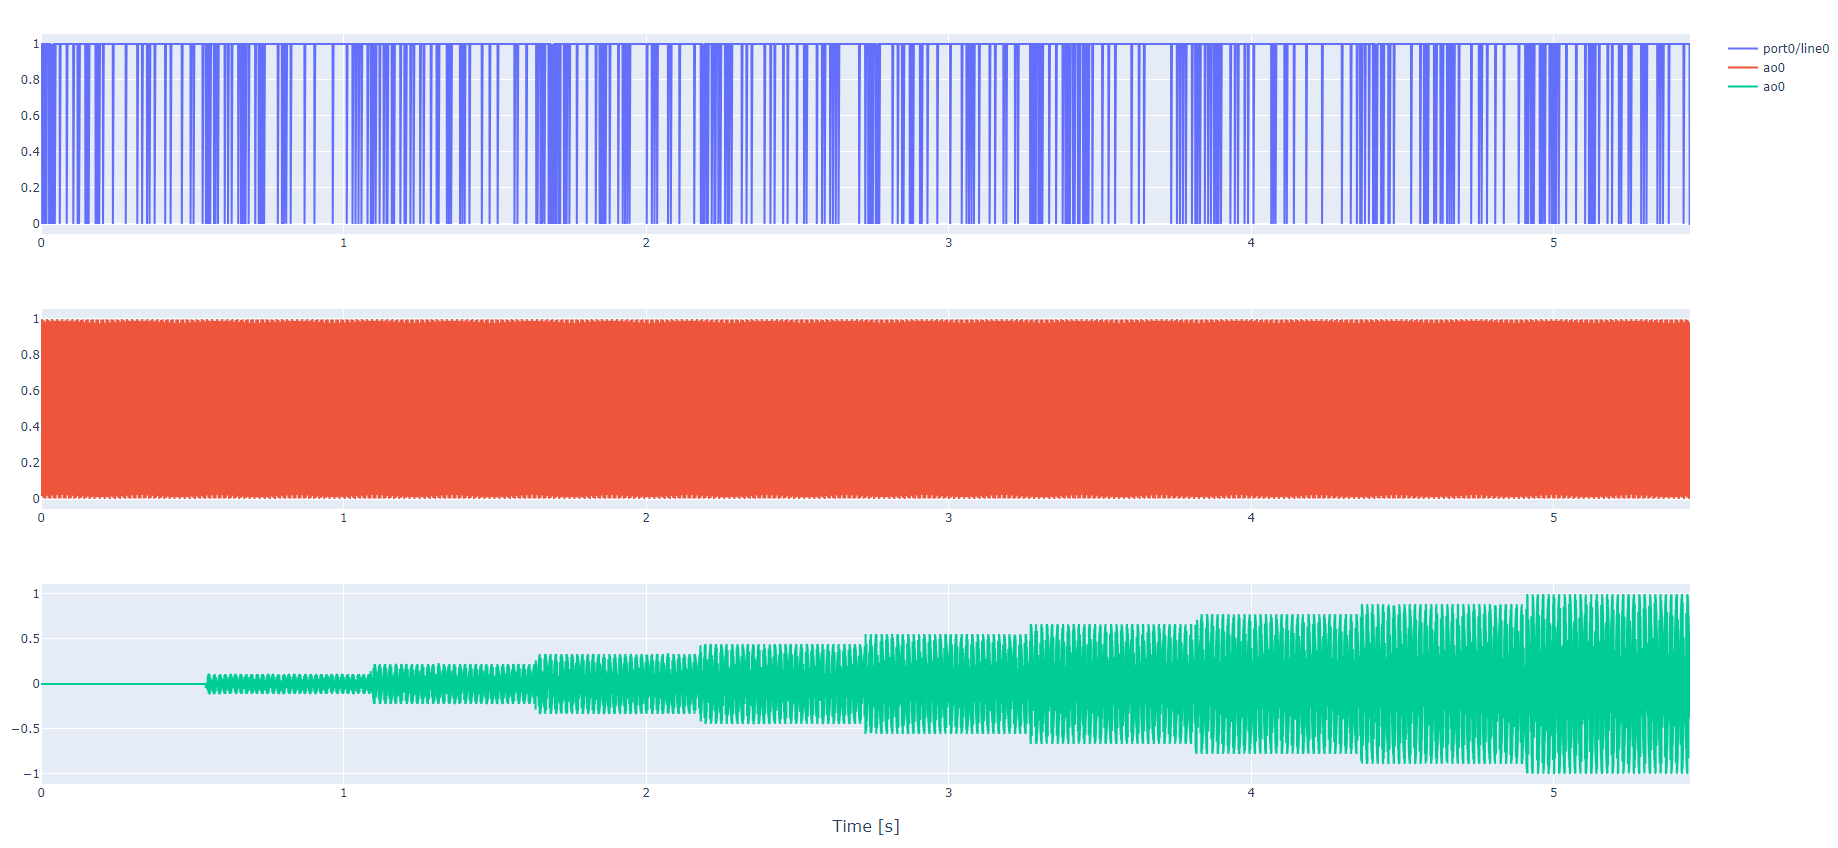

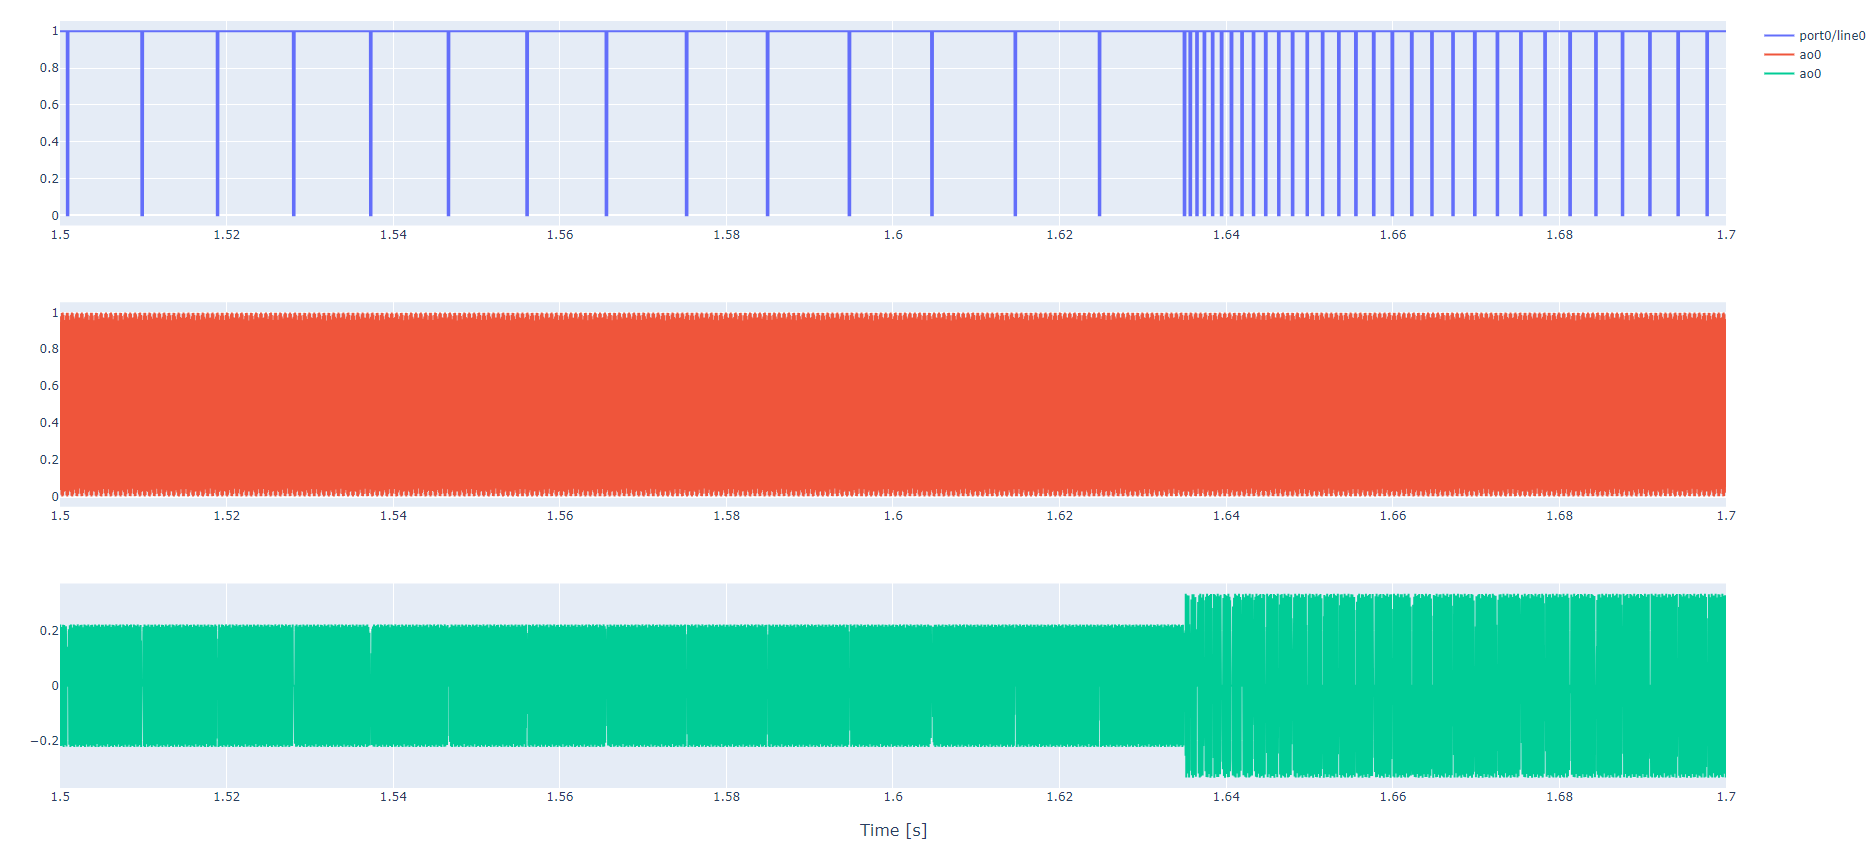

In [27]:
# Stress test - large number of channels
iplot(
    chan_list=[mot_aom_pwr for _ in range(100)],
    t_start=1.5,
    t_end=1.5 + 200e-3,
    nsamps=int(1e4),
    row_height=200,
    renderer=RendOption.browser
)

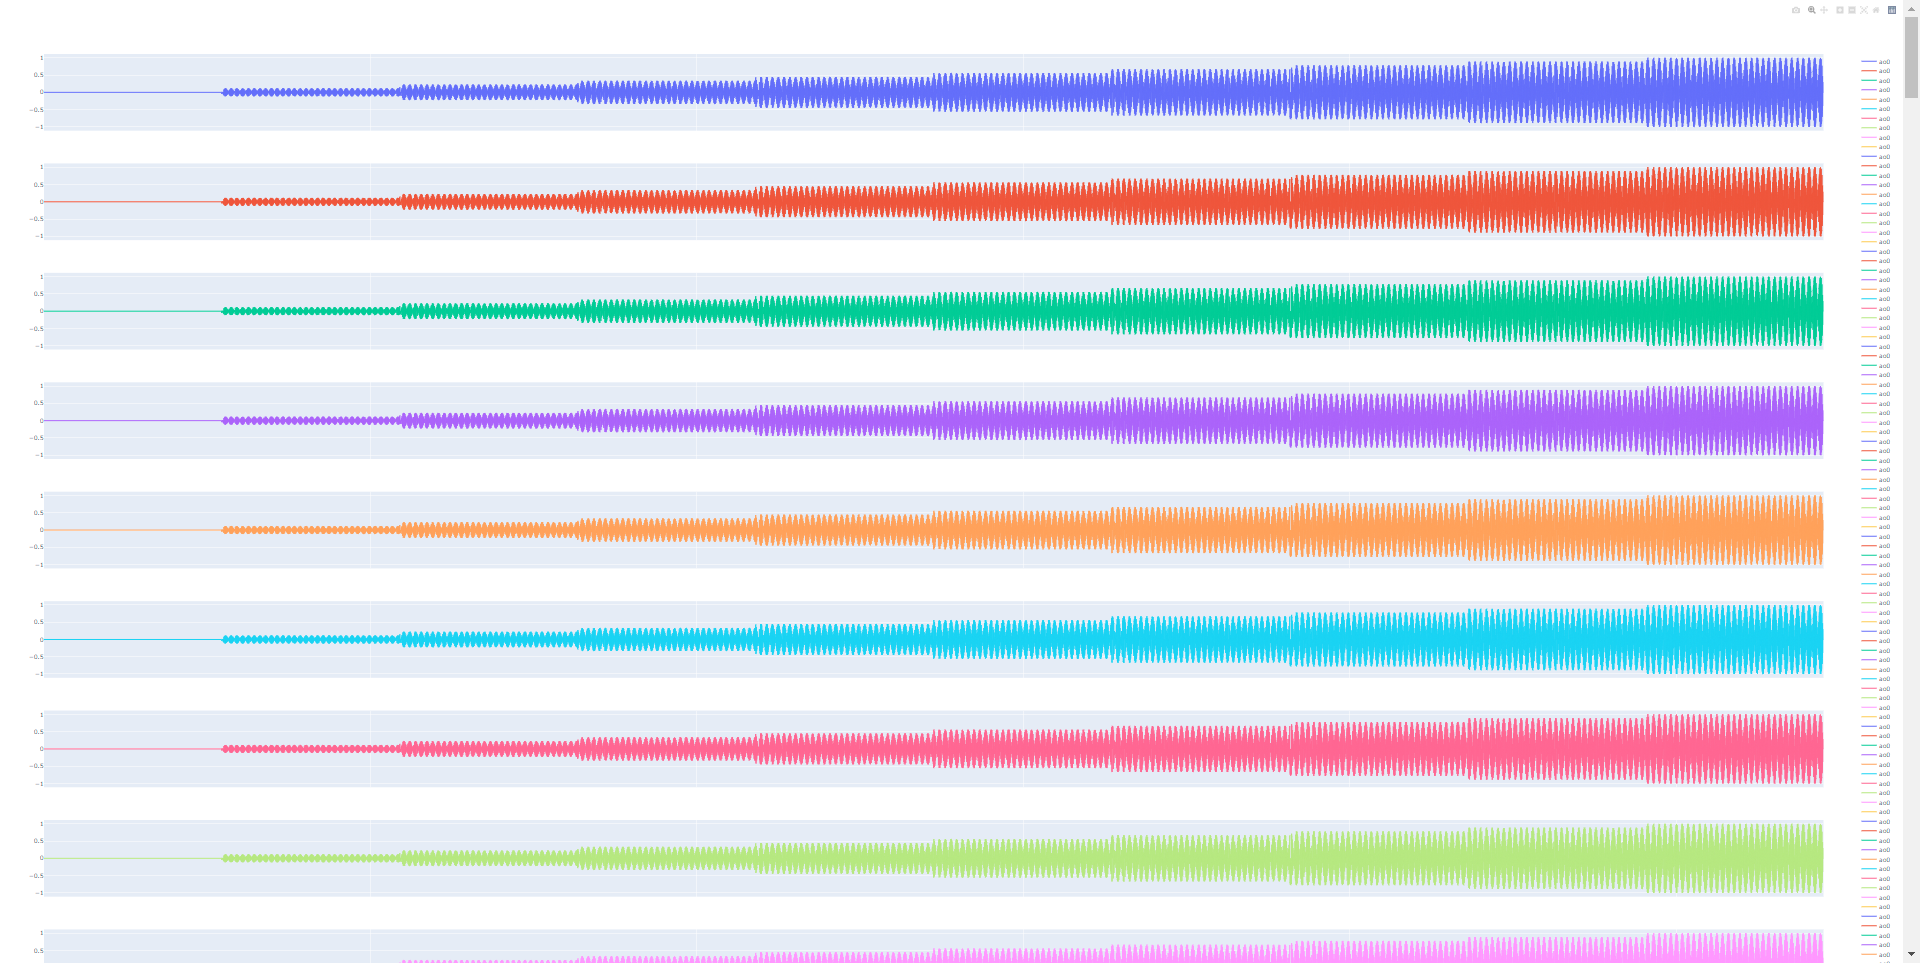

In [7]:
RendOption.browser

'browser'